In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [289]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [291]:
df['Target'] = df['Sales'].apply(lambda x: 'Low' if x <= 7.49 else 'High')

In [292]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [297]:
df[['Sales','Target']]

,Sales,Target
0,9.50,High
1,11.22,High
2,10.06,High
3,7.40,Low
4,4.15,Low
...,...,...
395,12.57,High
396,6.14,Low
397,7.41,Low
398,5.94,Low


In [270]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [271]:
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [272]:
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [273]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [274]:
df.drop('Sales',axis = 1,inplace = True)

In [275]:
restruct = {"ShelveLoc" :{'Bad':1,'Good':5,'Medium':3},
           'Urban':{'No':0,'Yes':1},'US':{'No':0,'Yes':1},
           'Target':{'Low':0,'High':1}}

In [276]:
df.replace(restruct,inplace = True)

In [277]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,138,73,11,276,120,1,42,17,1,1,1
1,111,48,16,260,83,5,65,10,1,1,1
2,113,35,10,269,80,3,59,12,1,1,1
3,117,100,4,466,97,3,55,14,1,1,0
4,141,64,3,340,128,1,38,13,1,0,0


Text(0.5, 1.0, 'income')

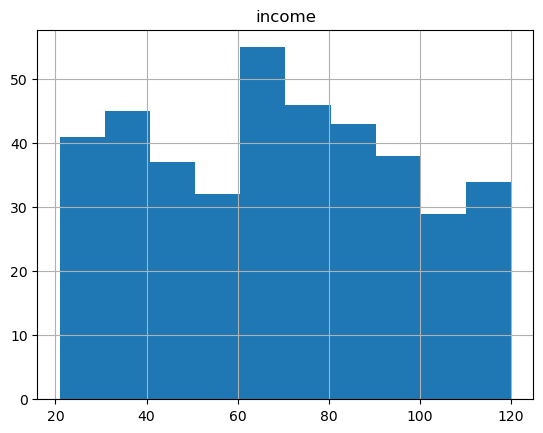

In [284]:
df['Income'].hist()
plt.title('income')

Text(0.5, 1.0, 'price')

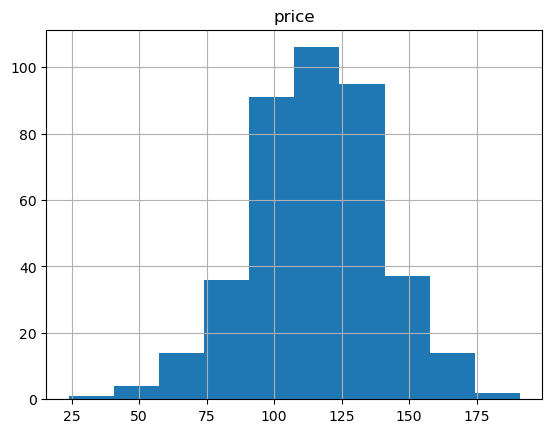

In [283]:
df['Price'].hist()
plt.title('price')

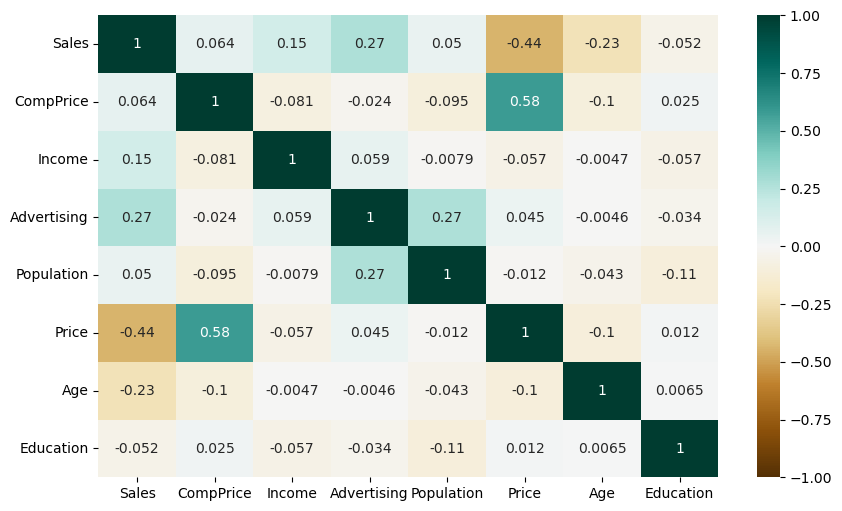

In [302]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),vmin =-1,vmax = 1,annot = True,cmap = 'BrBG')
plt.show()

In [232]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [233]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,5,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,5,33,14,1,1
396,139,23,3,37,120,3,55,11,0,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [234]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Target, Length: 400, dtype: int64

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [236]:
from sklearn.tree import DecisionTreeClassifier

dTree_model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [237]:
print(dTree_model1.score(X_train, y_train)) # accuracy
print(dTree_model1.score(X_test, y_test))

1.0
0.6833333333333333


In [238]:
'''dTreeR_Model2 = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTreeR_Model2.fit(X_train, y_train)
print(dTreeR_Model2.score(X_train, y_train))
print(dTreeR_Model2.score(X_test, y_test))'''

"dTreeR_Model2 = DecisionTreeClassifier(criterion = 'entropy', random_state=1)\ndTreeR_Model2.fit(X_train, y_train)\nprint(dTreeR_Model2.score(X_train, y_train))\nprint(dTreeR_Model2.score(X_test, y_test))"

In [239]:
dTreeR_Model2.feature_importances_

array([0.17864916, 0.03757724, 0.09880941, 0.03818467, 0.33812441,
       0.14463573, 0.13660111, 0.02741827, 0.        , 0.        ])

In [240]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR_Model2.feature_importances_, columns = ["Imp"], index = X_train.columns))

                  Imp
CompPrice    0.178649
Income       0.037577
Advertising  0.098809
Population   0.038185
Price        0.338124
ShelveLoc    0.144636
Age          0.136601
Education    0.027418
Urban        0.000000
US           0.000000


In [241]:
y_predict = dTree_model1.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# Fraud data

In [242]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [244]:
df.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [245]:
restruct2 = {'Marital.Status' :{'Single':1,'Divorced':0,'Married':2},
           'Urban':{'NO':0,'YES':1},'Undergrad':{'NO':0,'YES':1}}

In [246]:
df.replace(restruct2,inplace= True)

In [247]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [249]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,2,98592,180083,17,0


In [250]:
df['fraudulent'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [251]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraudulent
0,0,1,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,2,36925,160205,30,1,Good
3,1,1,50190,193264,15,1,Good
4,0,2,81002,27533,28,0,Good


In [252]:
df['fraudulent'].value_counts()

Good     476
Risky    124
Name: fraudulent, dtype: int64

In [253]:
df['fraudulent'] = df['fraudulent'].map({'Good':0,'Risky':1})

In [254]:
df.drop('Taxable.Income',inplace= True,axis = 1)

In [255]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,fraudulent
0,0,1,50047,10,1,0
1,1,0,134075,18,1,0
2,0,2,160205,30,1,0
3,1,1,193264,15,1,0
4,0,2,27533,28,0,0


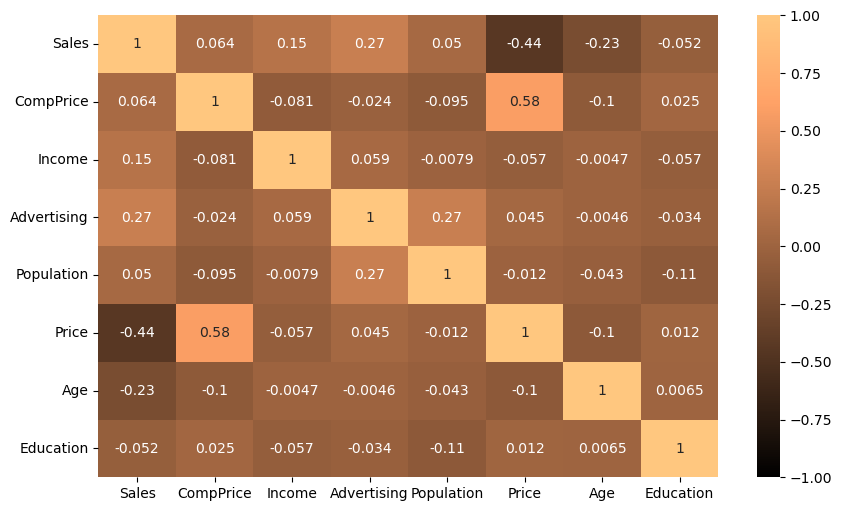

In [309]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),vmin =-1,vmax = 1,annot = True,cmap = 'copper')
plt.show()

In [257]:
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

In [258]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,1,50047,10,1
1,1,0,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,2,180083,17,0


In [259]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: fraudulent, Length: 600, dtype: int64

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=10)

In [261]:
dTreeR_Model = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,random_state=10)
dTreeR_Model.fit(X_train, y_train)
print(dTreeR_Model.score(X_train, y_train))
print(dTreeR_Model.score(X_test, y_test))

0.8142857142857143
0.7555555555555555


In [262]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR_Model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                      Imp
Undergrad        0.000000
Marital.Status   0.014621
City.Population  0.687681
Work.Experience  0.297698
Urban            0.000000


In [263]:
y_predict = dTreeR_Model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)